<a href="https://colab.research.google.com/github/LazarevaL/wb_hw/blob/main/hw_stat1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Задача 1**

Из партии батареек с номинальным напряжением 12 В наугад выбрано семь штук. Согласно показаниям высокоточного вольтметра, фактически выдаваемое ими напряжение составило: 12,9; 11,6; 13,5; 13,9; 12,1; 11,9; 13,0 В соответственно. Можно ли считать, что среднее напряжение действительно равно 12 В?

In [4]:
import pandas as pd
import numpy as np
from scipy import stats

In [6]:
#Н0 гипотеза - мат ожидание напряжения батареек = 12 В
#Н1 гипотеза - мат ожидание напряжения батареек <> 12 В
#для тестирования испрользуем одновыборочны t-тест, используем p value = 0.05


sample = np.array([12.9, 11.6, 13.5, 13.9, 12.1, 11.9, 13])
mu0 = 12

In [8]:
stats.ttest_1samp(sample, mu0)
#полученное p-value больше коэффициента значимости, принимаем нулевую гипотез, среднее напряжение равно 12В

TtestResult(statistic=2.1578017974978794, pvalue=0.07430190210562304, df=6)

**Задача 2**

Есть два различных метода определения процентного содержания жира в мясе. Доля жира для 10 образцов мяса была определена каждым из двух методов. Позволяют ли полученные результаты сделать вывод о том, что один метод даёт в среднем более высокие показания, чем другой?

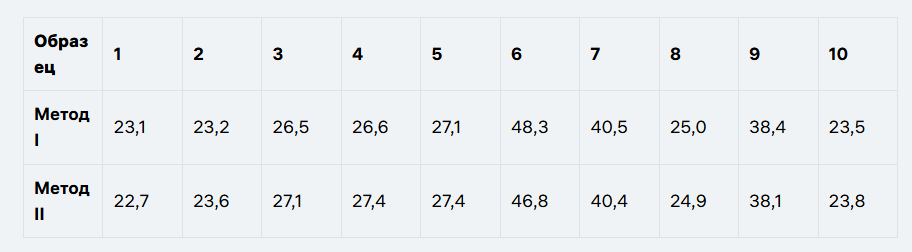

In [9]:
#Н0 гипотеза - метод 1 и метод 2 одинаковы
#Н1 гипотеза - есть значимая разница в методе 1 и методе 2
#для тестирования испрользуем двухвыборочный t-тест, используем p value = 0.05

x = np.array([23.1, 23.2, 26.5, 26.6, 27.1,  48.3, 40.5, 25.0, 38.4, 23.5])
y = np.array([22.7, 23.6, 27.1, 27.4, 27.4, 46.8,40.4, 24.9, 38.1, 23.8])

In [10]:
d = x - y
stats.ttest_1samp(d,0)
#полученное p-value больше коэффициента значимости, принимаем нулевую гипотез, методы не имеют различий

TtestResult(statistic=1.7154884978678027e-15, pvalue=0.9999999999999987, df=9)

**Задача 3**

Для проверки гипотезы о том, что жители городов имеют в среднем более высокое систолическое артериальное давление, чем жители сельской местности, было проведено обследование 10 горожан и 9 жителей села примерно одного возраста. Получены следующие данные об уровне давления для горожан: 132, 111, 119, 138, 200, 131, 138, 170, 159, 140; для селян: 115, 190, 127, 155, 148, 121, 116, 121, 197. Можно ли считать верной выдвинутую гипотезу на уровне значимости 0,05?

In [11]:
#Н0 гипотеза - среднее давление одинаково у жителей города и села
#Н1 гипотеза -есть различия в среднем давлении у жителей города и села
#для проверки гипотезы используем двухбырочный критерий Стьюдента для независимых выборок

x = [132, 111, 119, 138, 200, 131, 138, 170, 159, 140]
y = [115, 190, 127, 155, 148, 121, 116, 121, 197]

In [12]:
stats.ttest_ind(x,y).pvalue/2
#на уровне значимости 0.05 мы не можем отвергнуть нулевую гипотезу, средние давление жителей города не выше чем у жителей села

0.486178812200461

**Задача 4**

Известно, что 52% новорождённых детей — мальчики, а 48% — девочки. В случайной выборке из 5 000 человек в возрасте от 30 до 60 лет мужчин оказалось 2 500. Можно ли на уровне значимости 0,05 считать, основываясь на этих данных, что смертность среди мужчин и женщин одинакова?

In [13]:
#Н0 гипотеза - смертность в двух группа одинаковая
#Н1 гипотеза - есть различия в смертности в двух группа одинаковая
#используем биномиальный критерий для проверки гипотезы о равенстве долей/вероятностей

n1 = 2500
m1 = 52
n2 = 2500
m2 = 48


In [14]:
T = (m1/n1 - m2/n2)/((m1+m2)/(n1+n2)*(1 - (m1+m2)/(n1+n2))*(1/n1 + 1/n2))**0.5
P = 1 - stats.norm.cdf(T)
print("Statistic: ",T,", p-value: ",P)
#на уровне значимости 0.05 мы не можем отвергнуть нулевую гипотезу, смертность в двух группа одинаковая

Statistic:  0.40406101782088444 , p-value:  0.34308392492761963


**Задача 5**

В первом эксперименте для сравнения двух средних X1=17, X2=16 применялся t-критерий Стьюдента, и эти различия оказались значимы (p = 0, 001).

Во втором исследовании, также при помощи t - критерия, сравнивались два средних X1=17, X2=36, и эти различия не значимы при p = 0,8. В чем может быть причина таких результатов, при условии, что нулевая и альтернативная гипотезы в обоих случаях одинаковы?

Предположим, что при экспериментах выборки были проверены на нормальность/приведены к нормальным, и распределение не могло повлиять на результаты.

Тогда, причинами таких резлуьтатов могли быть размеры выборок в экспериментах и их дисперсия. К примеру, у выборок в первом случае могла быть небольшая дисперсия, также возможно что в первом эксперименте был значительно бОльший объем данных чем во втором.